#**Gráficos descriptivos básicos con Seaborn Python**

En esta lección, se hará una revisión de los gráficos más usuales para labores descriptivas de variables con Seaborn. El tipo de gráfico dependerá del tipo de variable e incluso del número de variables que deseamos describir. Inicialmente, describiremos variables cuantitativas y variables cualitativas, haremos análisis univariado o bivaluado.

Se trabajará mayormente con el conjunto de datos *iris*, el cual contiene información sobre cuatro características (largo y ancho de sépalos y pétalos) de 50 muestras de tres especies de plantas Iris (Iris setosa, Iris virginica e Iris versicolor).

Estas medidas se utilizaron para crear un modelo discriminante lineal para clasificar las especies. El conjunto de datos se utiliza a menudo en ejemplos de extracción de datos, clasificación y agrupación y para probar algoritmos.

In [71]:
# matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

x = np.random.normal(size=100) # una distribución normal aleatoria de numpy

sns.set_theme()
#tips = sns.load_dataset("tips")  ## conjunt de datos de propinas
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv') # Importar el dataset tips


## **Análisis univariados**

###**Variables cuantitativas**

###Histogramas

Cuando describimos variables cuantitativas lo principal es conocer su forma, sobre que valores se hayan los datos y como son de dispersos y para ello el gráfico estrella es el **histograma**. *histplot* muestra un histograma de recuento muy estándar.

<Axes: xlabel='sepal_width', ylabel='Count'>

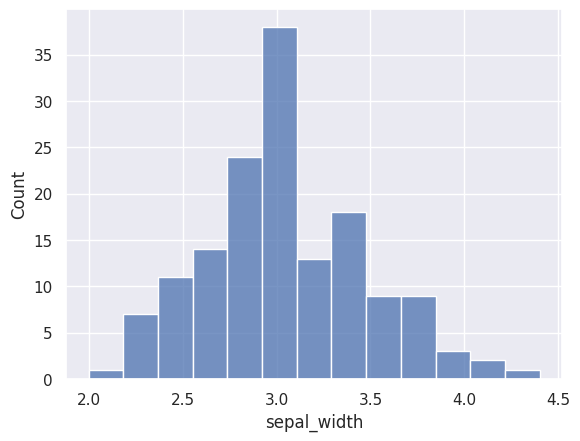

In [72]:
sns.histplot(data=iris, x="sepal_width")



*   Elemento de la lista
*   Elemento de la lista



### Graficos de densidad

Si queremos ver la distribución como una línea continua disponemos de los **gráficos de densidad**, usando *kdeplot* (*kernel density estimate*):

<Axes: xlabel='sepal_width', ylabel='Density'>

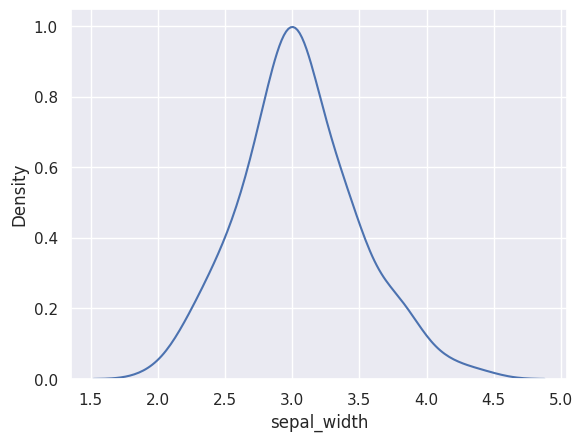

In [73]:
#sns.kdeplot(iris['sepal_width'], bw=0.5)
sns.kdeplot(iris["sepal_width"])

Otra forma de hacer lo mismo es mediante la función *displot* con el parámetro *kind="kde"*. Con ambas funciones se puede visualizar una distribución de datos univariada o bivariada :

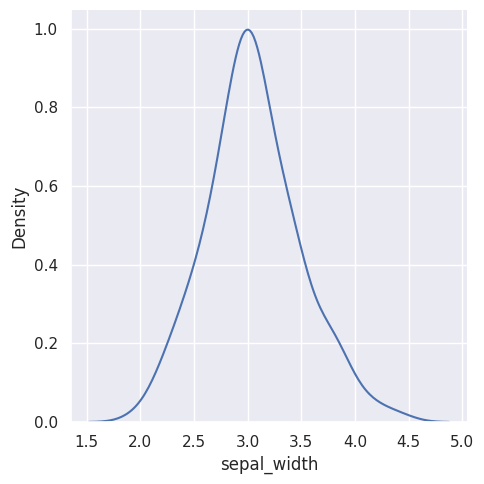

In [74]:
sns.displot(iris["sepal_width"], kind="kde")

Con *histplot* podemos tener ambos gráficos en uno. Esta función muestra un histograma (usando normalización de densidad) y una estimación de densidad del núcleo superpuesta:

<Axes: xlabel='sepal_width', ylabel='Count'>

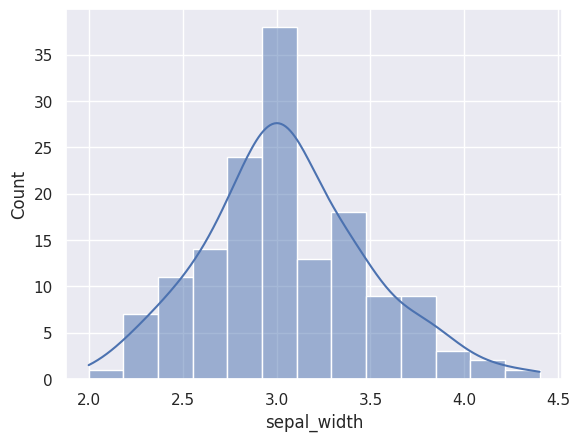

In [75]:
sns.histplot(iris["sepal_width"], kde=True)

Si quitamos el parámetro *kde=True*, se desplegaría solo el  histograma. Aporvechamos para usar el método show de matplotlib para evitar que se impriman los datos del objeto de seaborn.



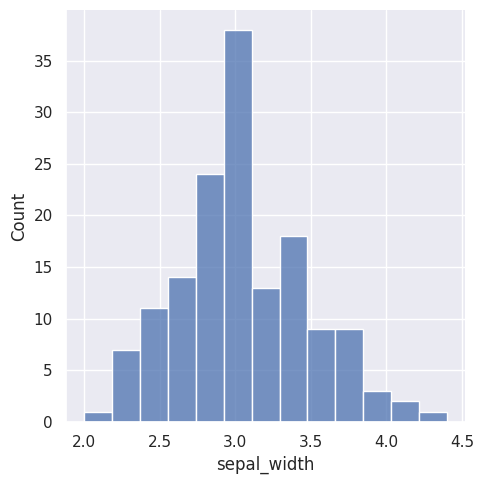

In [76]:
sns.displot(iris["sepal_width"])

import matplotlib.pyplot as plt
plt.show()

###Diagramas de alfombra

Un diagrama de alfombra es un gráfico con graduaciones en la base y se pueden generar con *distplot* e *histplot*.

 Ambas funciones se diferencian en que  este último no  puede implementar directamente un diagrama de alfombra.

 Se puede modificar la transparencia del color del histograma usando el parámetro *alpha*.

Si se usa histplot, se debe llamar a *rugplot* en forma complementaria.

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

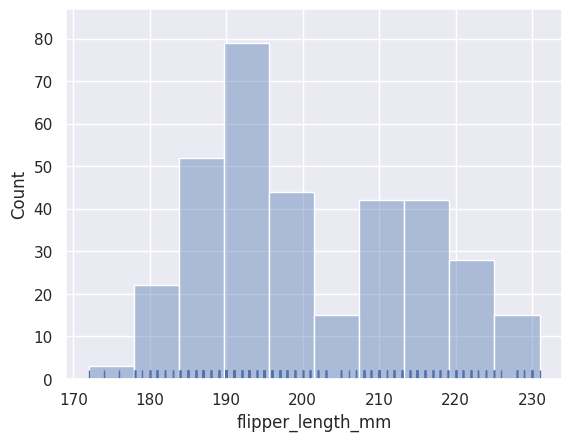

In [77]:
sns.histplot(penguins, x="flipper_length_mm", alpha=.4)
sns.rugplot(penguins, x="flipper_length_mm")

Con *displot* siempre se puede agregar la alfombra. Para eso se usa el parámetro rug con valor de *True*.

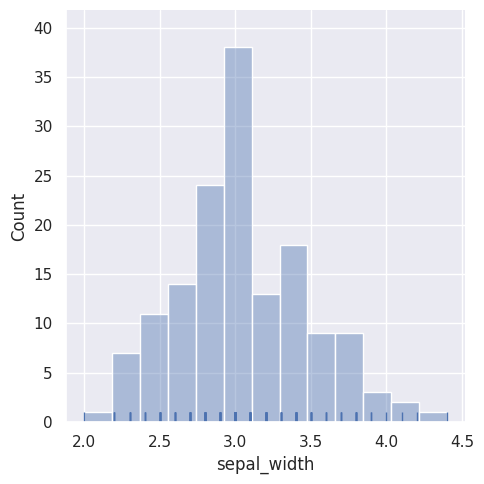

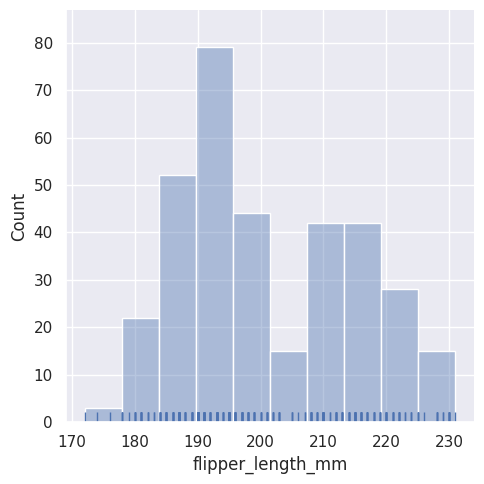

In [78]:
sns.displot(iris["sepal_width"], alpha=.4, rug=True)
sns.displot(penguins, x="flipper_length_mm", alpha=.4, rug=True)

Entre otra de las monerías de displot es que se puede controlar el número de barras (bins)

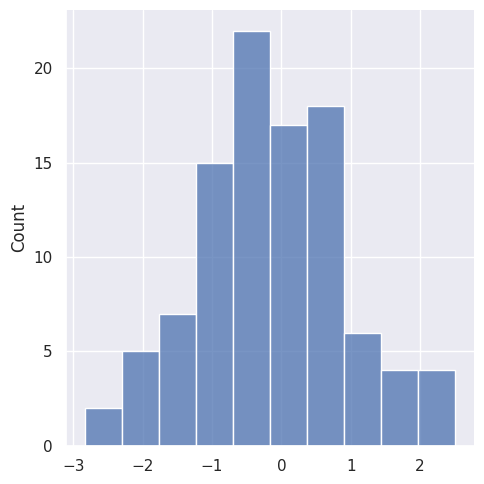

In [79]:
sns.displot(x, kde=False, rug=False, bins=10)

###Gráfico de caja y bigotes

Los gráficos de caja dan mucha información de una variable. La caja indica donde está el 75%, que es lo que definimos como rango intercuartílico. Tambien incluye una línea que indica la mediana. Los bigotes dan una idea de lo disperso que están los datos, e incluso si hay observaciones que están 1.5 veces por encima del rango intercuartílico las da más importancia marcándolas con puntos y que se pueden denominar datos extremos.

Para construir gráficos de cajas usaremos la función *boxplot* de seaborn:

<Axes: >

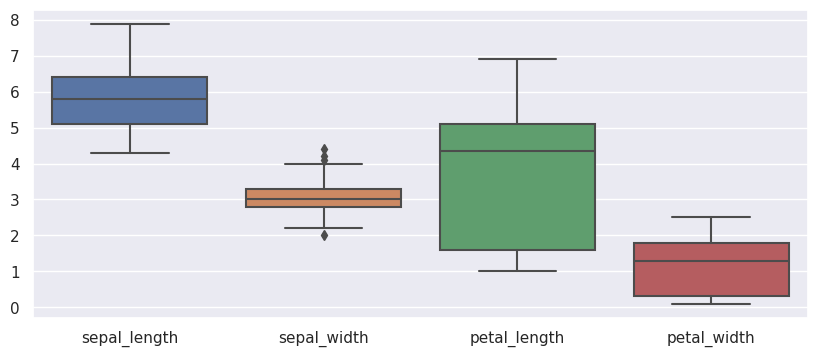

In [80]:
#plt.figure(figsize=(12,9))
plt.figure(figsize=(10,4))
sns.boxplot(data=iris)

Un diagrama de caja (boxplots o gráfico de caja y bigotes) muestra la distribución de datos cuantitativos de una manera que facilita las comparaciones entre variables o entre niveles de una variable categórica.

El cuadro o caja muestra los cuartiles del conjunto de datos, mientras que los bigotes se extienden para mostrar el resto de la distribución, a excepción de los puntos que se determinan como “valores atípicos” utilizando un método que es una función del rango intercuartílico.

<Axes: xlabel='sepal_length'>

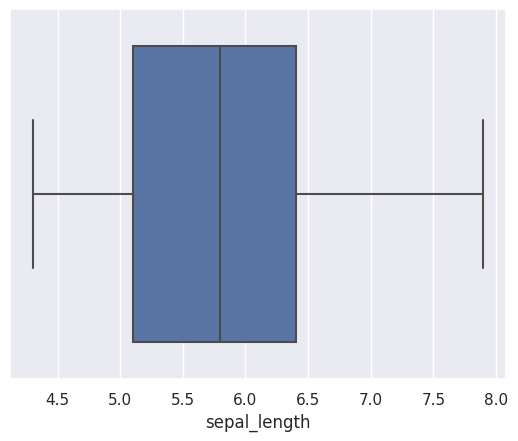

In [81]:
sns.boxplot(x="sepal_length", data=iris)

###**Variables cualitativas**


### Gráfica de barras

Para describir variables cualitativas el gráfico más habitual es el **gráfico de barras** donde contamos observaciones, en seaborn tenemos *countplot*:

<Axes: xlabel='species', ylabel='count'>

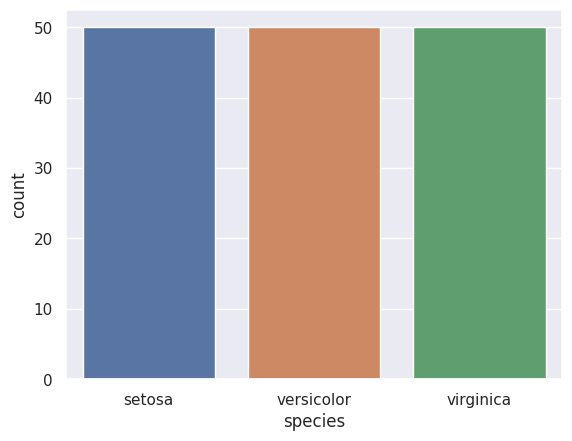

In [82]:
sns.countplot(x='species', data=iris)

In [83]:
#sns.countplot(x='sex', hue='embarked', data=titanic, palette='Greens_d')

Sin embargo, se sugiere que este tipo de gráficos se haga después de realizar una tabla de agregación, en este caso con pandas, los tiempos de ejecución siempre son menores:

<Axes: xlabel='species', ylabel='sepal_length'>

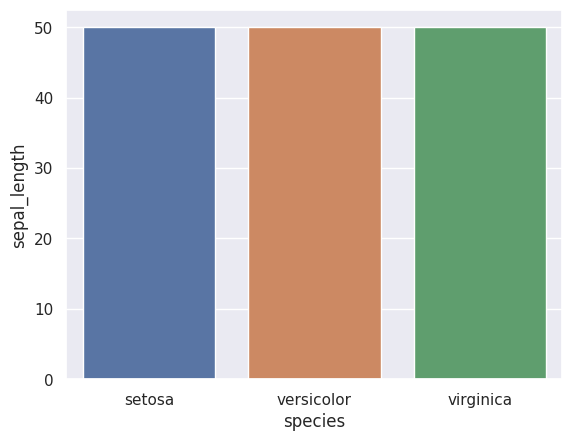

In [84]:
agr = iris[['sepal_length','species']].groupby('species').count()
agr = agr.reset_index()
sns.barplot(x='species', y='sepal_length', data=agr)

Con seaborn no se pueden hacer gráficos de pastel, así que no describiremos variables cualitativas de ese modo.

##**Análisis bivariable**

Disponemos de los gráficos básicos para describir una variable, pero habitualmente necesitaremos describir una variable en función de otra y así tenemos gráficos bivariables con las posibles combinaciones entre los tipos de las variables a describir.

###**Dos variables cuantitativas**

###Gráficos de puntos
En este caso tenemos el el habitual gráfico de puntos

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

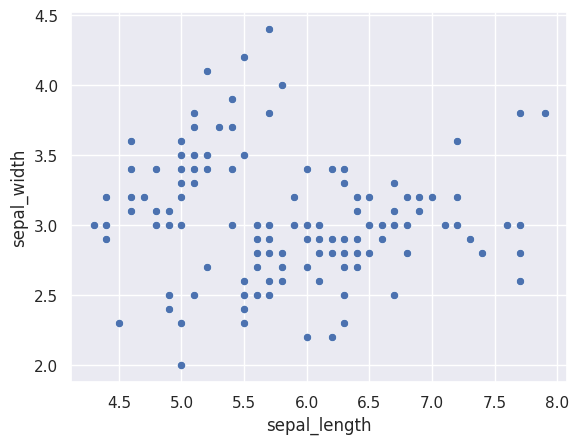

In [85]:
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width")

Si lo hicieramos con matplotlim sería como sigue:

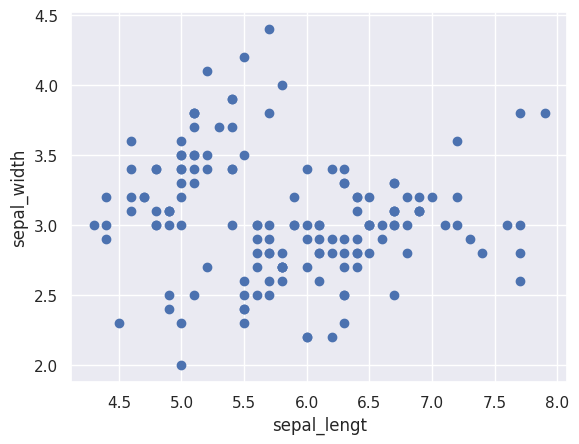

In [86]:
##con matplotlib
plt.plot(iris.sepal_length, iris.sepal_width, 'bo')
plt.xlabel('sepal_lengt')
plt.ylabel('sepal_width')
plt.show() #pa'quitar el texto

Podemos agregar una variable cualitativa para identificar segmentos (clústers). Esto se logra usando el parámetro *hue* con el valor del segmento deseado.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

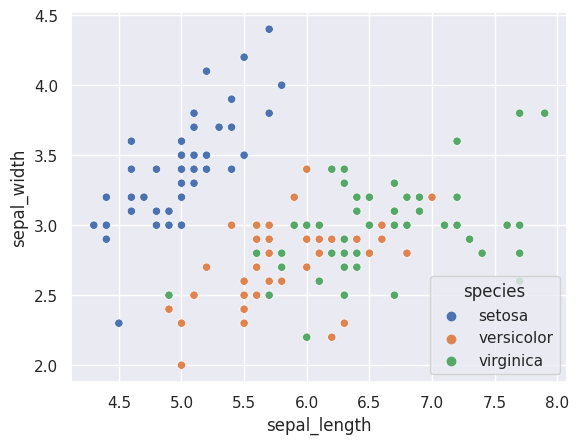

In [87]:
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species")

La función lmplot de seaborn, entrena un sencillo modelo de regresión lineal y muestra la recta resultante en el intervalo de confianza del 95%. Todo esto nos permite tener una idea más clara de la relación entre las variables en análisis.

Podemos utilizar el parámetro *hue* para separar nuestro conjunto de datos según los valores que tome una variable categórica, y mostrar los puntos correspondientes a cada grupo con colores distintos y con una recta de regresión para cada uno de ellos. El estilo del gráfico puede variar al gusto de cada quién. Por ejemplo, establecerlo como *darkgrid*.

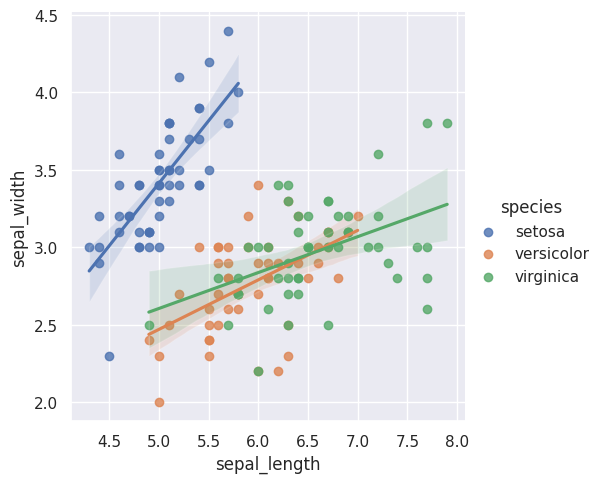

In [88]:
sns.set_style('darkgrid')
sns.lmplot(x='sepal_length', y='sepal_width', data=iris, hue='species')
plt.show()

Para mejorar el contraste se puede usar un estulo de la gráfica del tipo whitegrid. Por otra parte, para evitar que se vea muy saturada la gráfica, se eliminarán las rectas de regresión estableciendo el atributo *fit_reg = False*. Se pueden combinar instruciones de matplotlib para agregar un titulo y ajustar los límites de los ejes.

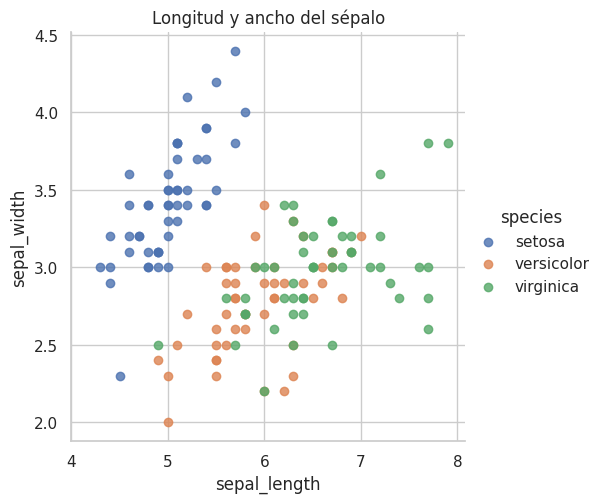

In [89]:
sns.set_style('whitegrid')
sns.lmplot(x='sepal_length', y='sepal_width', data=iris, fit_reg = False, hue='species')
plt.xlim(4)
plt.title("Longitud y ancho del sépalo")
plt.show()

###Gráficos de densidades

En otros gráficos, como los gráficos de densidades, en vez de usar *hue* directamente se trabaja con data frames separados, como en el ejemplo siguiente, que compara los gráficos de densidades de una variable en función de otra cuantitativa:

<function seaborn.axisgrid.jointplot(data=None, *, x=None, y=None, hue=None, kind='scatter', height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, color=None, palette=None, hue_order=None, hue_norm=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, **kwargs)>

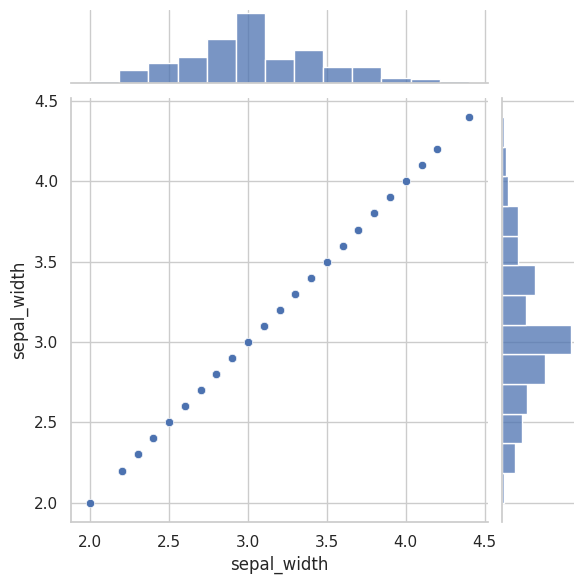

In [90]:
sns.jointplot( data=iris, x='sepal_width', y='sepal_width')
sns.jointplot

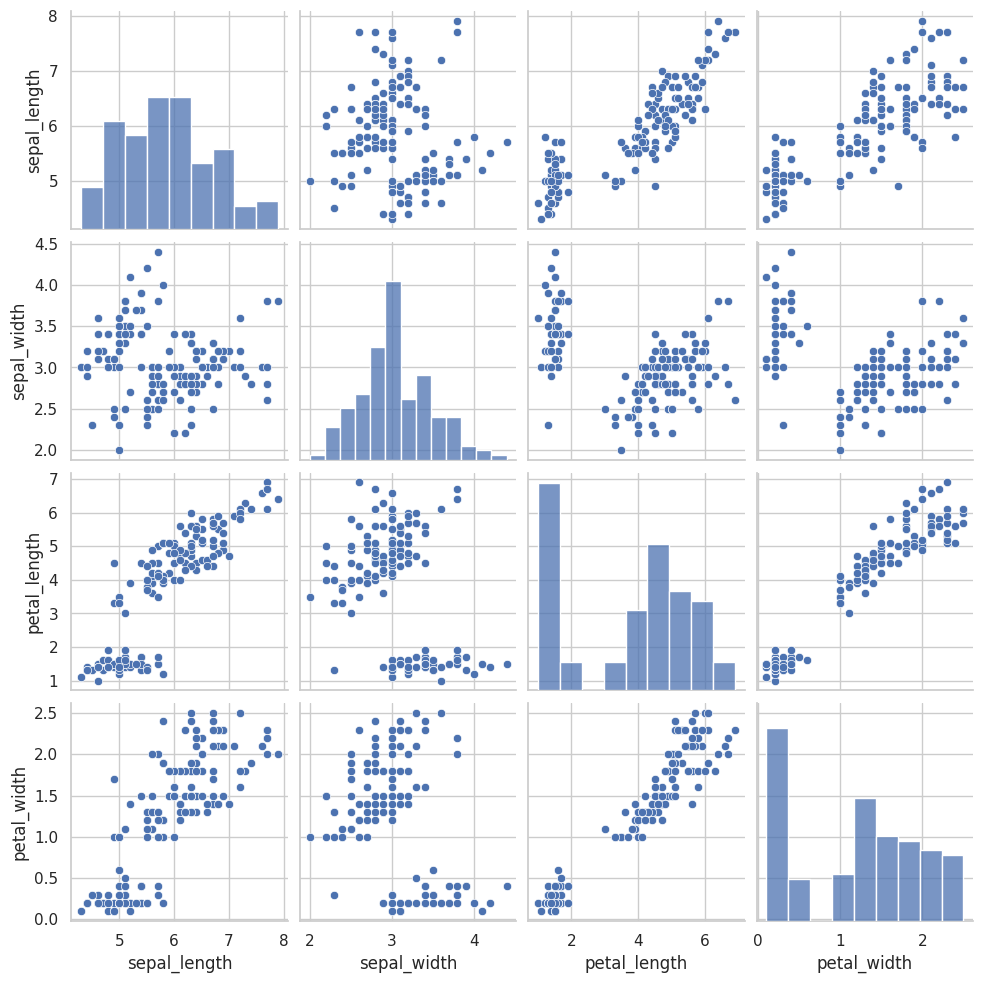

In [91]:
sns.pairplot(iris)

In [92]:
type(iris)

pandas.core.frame.DataFrame

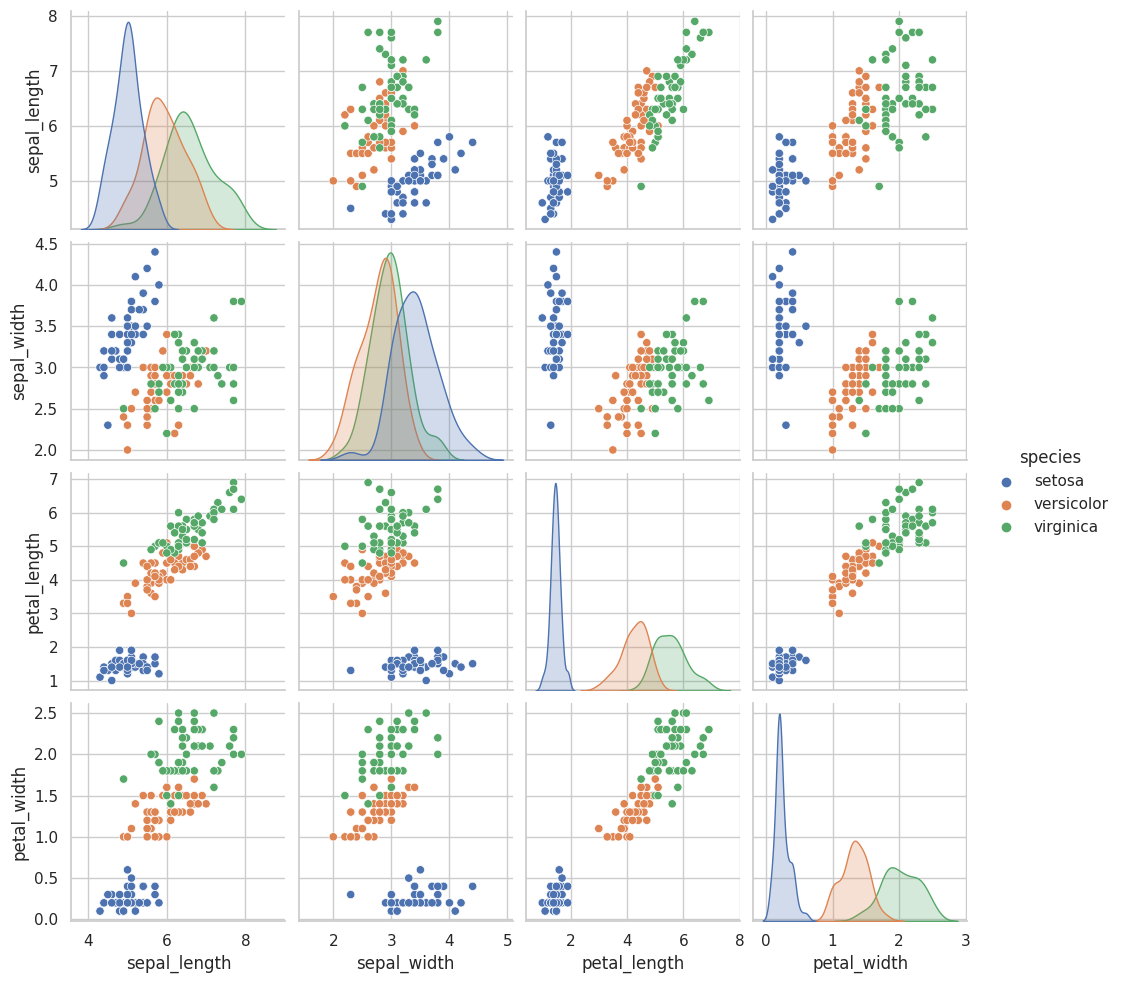

In [93]:
sns.pairplot(iris, hue="species")

También se pueden realizar gráficos de densidades bivariables:

<Axes: xlabel='sepal_length', ylabel='Density'>

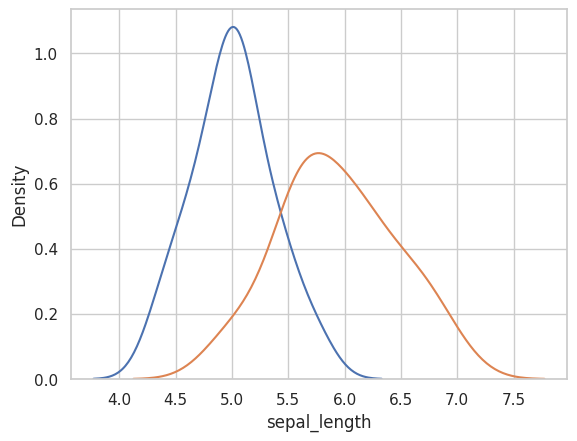

In [94]:
df1 = iris[iris['species']=="setosa"]
df2 = iris[iris['species']=="versicolor"]

sns.kdeplot(df1['sepal_length'], bw_method=0.5)
sns.kdeplot(df2['sepal_length'], bw_method=0.5)

<ipython-input-95-3ad1c658e368>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=iris, x='sepal_length', y='sepal_width', shade=True)


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

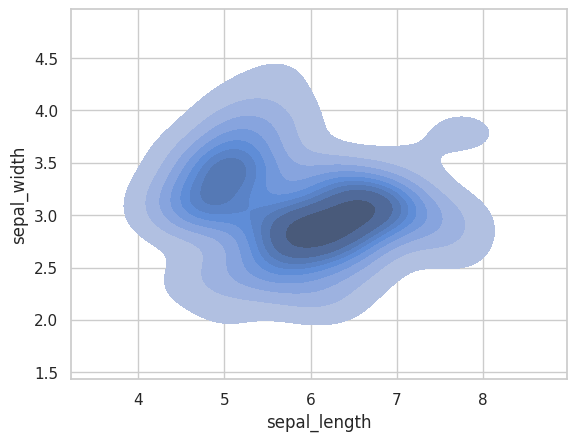

In [95]:
sns.kdeplot(data=iris, x='sepal_length', y='sepal_width', shade=True)


<Axes: xlabel='size', ylabel='tip'>

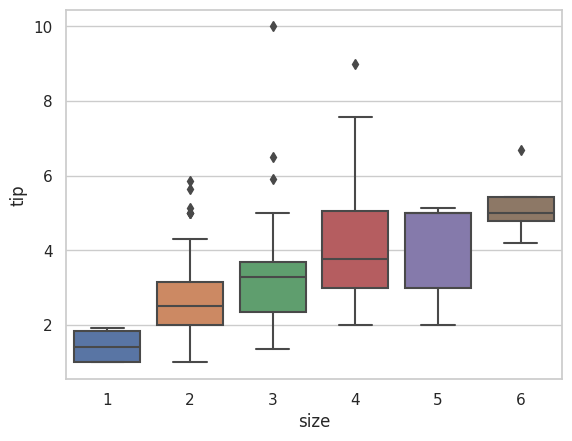

In [96]:
sns.boxplot(x="size", y="tip", data=tips.sort_values('size'))

### **Dos variables cualitativas**

En este caso es necesario emplear otras opciones de los diagramas de barras como añadir una nueva barra.

<Axes: xlabel='species', ylabel='sepal_length'>

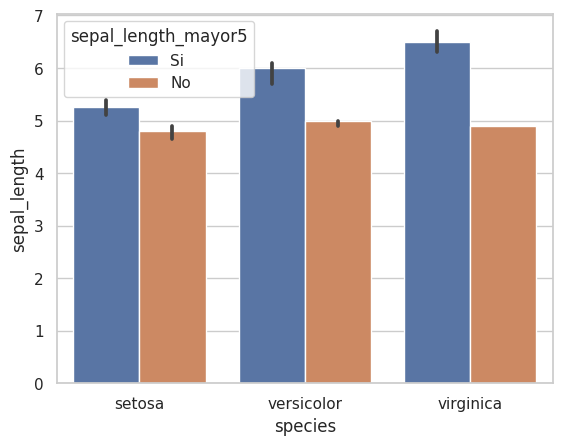

In [97]:
iris['sepal_length_mayor5'] = np.where(iris['sepal_length'] > 5,"Si", "No")

sns.barplot(x='species', y='sepal_length', hue = 'sepal_length_mayor5', data=iris, estimator= np.median)

Para columnas agrupadas no se recomienda el uso de seaborn, se complica el código. Pero se puede realizar con Pandas:

<Axes: xlabel='species'>

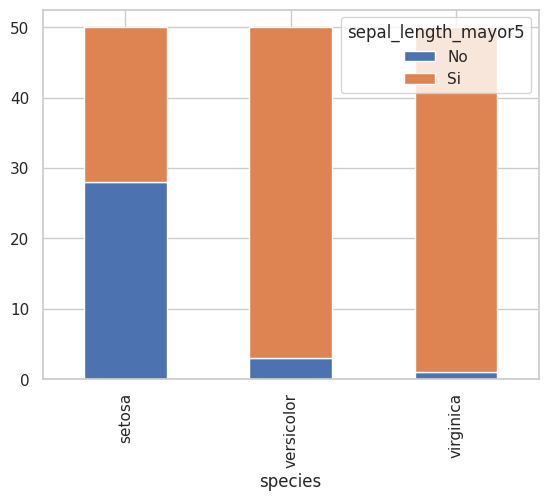

In [98]:
agr = iris.groupby(['species', 'sepal_length_mayor5']).size().reset_index().pivot(columns='sepal_length_mayor5', index='species', values=0)
agr.plot(kind='bar', stacked=True)

### **Una variable cuantitativa vs una cualitativa**

### Gráficas de densidades

Por último una mezcla entre ambos tipos de variables, con anterioridad se vio algún ejemplo, pero son imprescindibles los gráficos de densidades frente a variables cualitativas:

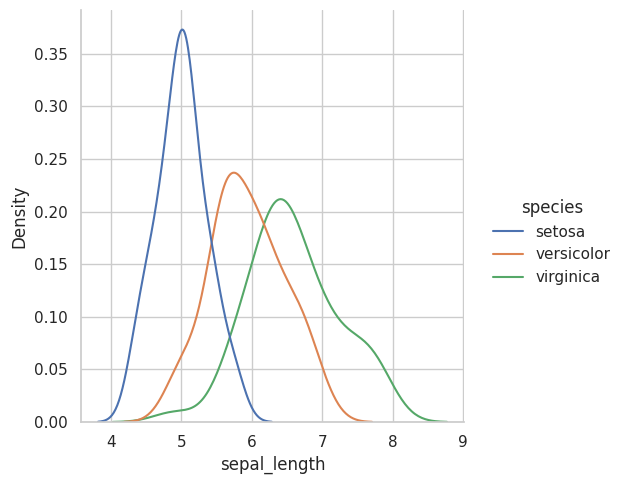

In [99]:
sns.displot(data=iris, x="sepal_length", hue="species", kind="kde")

### Gráficas de caja

<Axes: xlabel='species', ylabel='sepal_length'>

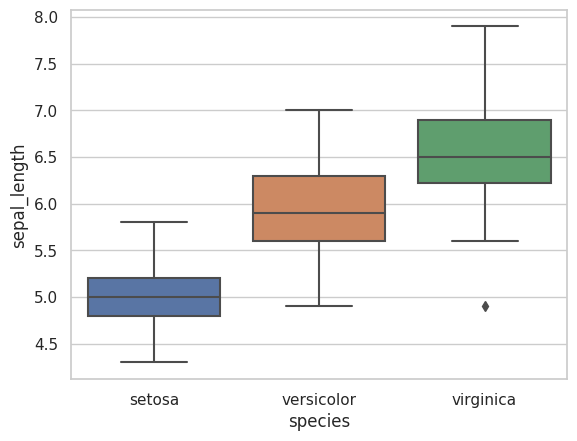

In [100]:
sns.boxplot(y="sepal_length", x='species', data=iris)

###Violinplot

Un diagrama de violín juega un papel muy similar al de un diagrama de cajas y bigotes. La gráfica muestra la distribución de datos cuantitativos a través de varios niveles de una (o más) variables categóricas de modo que esas distribuciones se puedan comparar. A diferencia de un diagrama de caja, en el que todos los componentes de la gráfica corresponden a los puntos de datos reales, la gráfica del violín presenta una estimación de la densidad del núcleo de la distribución subyacente.


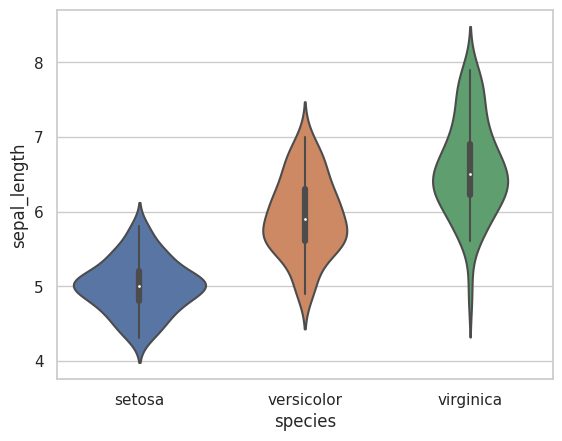

In [101]:
#plt.figure(figsize=(14,8))
sns.set_style('whitegrid')
sns.violinplot( x='species',y='sepal_length', data=iris)
plt.show()

Se puede cambiar el estilo del gráfico usando el método set_style.

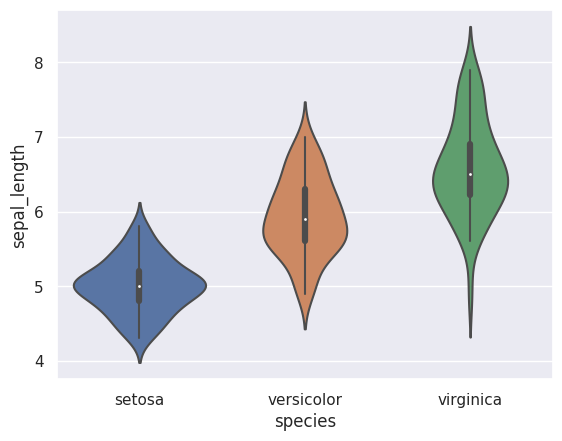

In [102]:
#plt.figure(figsize=(14,8))
sns.set_style('darkgrid')
sns.violinplot(x='species', y='sepal_length', data=iris)
plt.show()

Se puede definir una lista de colores personalizados.

In [103]:
colores_tipo_iris = ['#78C850',  # Grass
'#F08030',  # Fire
'#6890F0',  # Water
'#A8B820',  # Bug
'#A8A878',  # Normal
'#A040A0',  # Poison
'#F8D030',  # Electric
'#E0C068',  # Ground
'#EE99AC',  # Fairy
'#C03028',  # Fighting
'#F85888',  # Psychic
'#B8A038',  # Rock
'#705898',  # Ghost
'#98D8D8',  # Ice
'#7038F8',  # Dragon
]
colores_tipo_iris

['#78C850',
 '#F08030',
 '#6890F0',
 '#A8B820',
 '#A8A878',
 '#A040A0',
 '#F8D030',
 '#E0C068',
 '#EE99AC',
 '#C03028',
 '#F85888',
 '#B8A038',
 '#705898',
 '#98D8D8',
 '#7038F8']

Y así usarlos en como paleta de colores en el gráfico.

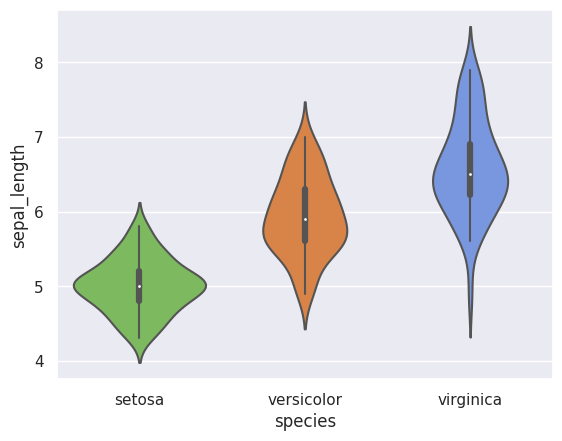

In [104]:
#plt.figure(figsize=(14,8))
sns.violinplot(x='species', y='sepal_length', data=iris,
               palette=colores_tipo_iris)
plt.show()

In [105]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


###Gráfico de puntos

<Axes: xlabel='day', ylabel='total_bill'>

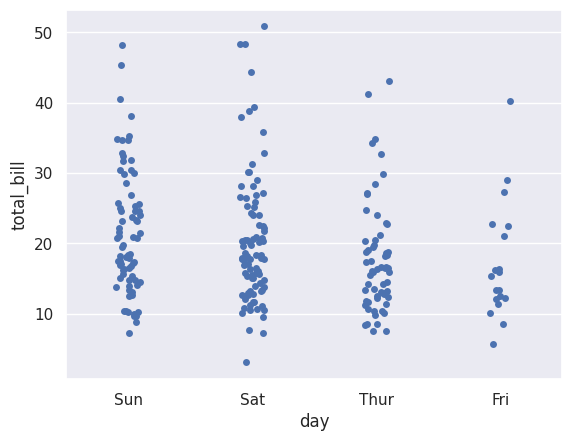

In [106]:
sns.stripplot(x="day", y="total_bill", data=tips)

Con segmentación por tiempo (time).

<Axes: xlabel='day', ylabel='total_bill'>

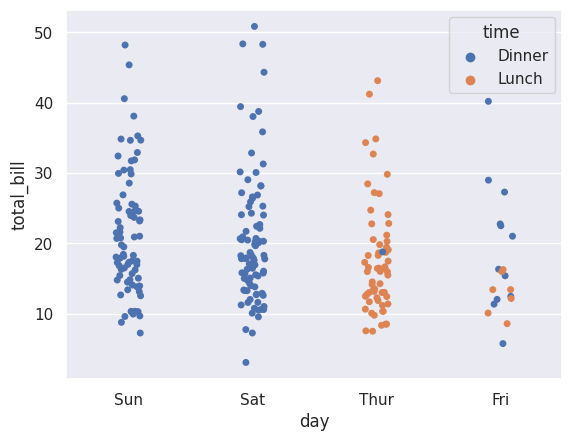

In [107]:
sns.stripplot(x="day", y="total_bill", data=tips, hue='time')

In [108]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Gráfico de barras

<Axes: xlabel='sex', ylabel='survived'>

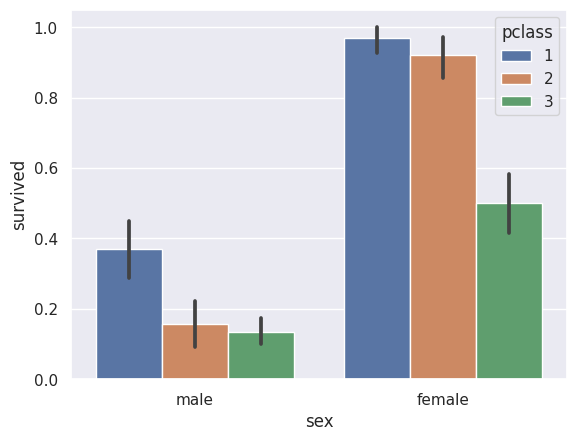

In [109]:
sns.barplot(x='sex', y='survived', data=titanic, hue='pclass')

<Axes: xlabel='sex', ylabel='survived'>

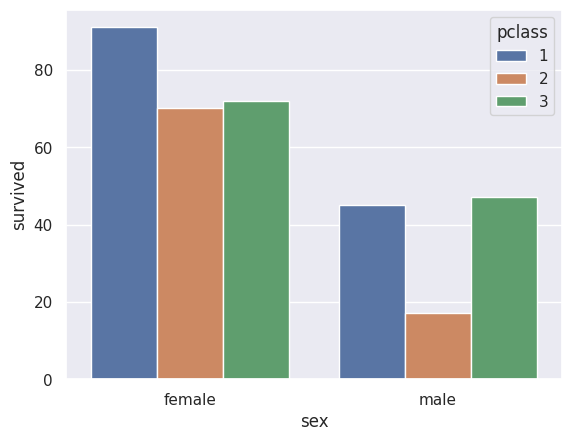

In [110]:
titanic_grpby = titanic.groupby( ['sex', 'pclass'])
titanic_data_for_graph = titanic_grpby['survived'].aggregate(sum).reset_index()

sns.barplot(x='sex', y='survived', hue= 'pclass', data=titanic_data_for_graph)